# Viola-Jones Face Detection Technique (Haar Cascades) - Batch Processing

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Resize image given either the desired width or the desired height and preserves aspect ratio
# Source: https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [3]:
# Load the image given the filename and return the imagefile
def load_picture(filename):
    img = cv2.imread(filename)
    # convert from BGR to RGB color scheme
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

In [4]:
# Save Mathplotlib's figure given the figure object and the desired output filename
def save_picture(fig,outputfilename):
    fig.savefig(outputfilename)

In [5]:
# Display the image maximizing the full screen
def display_fullpicture(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [6]:
# Displays the original image with the 'processed image' side by side using Mathplotlib subplot. The function
#    returns the figure object

def display_sidebysidepicture(img1,img2,maintitle='Original Image vs Image with Object Detection',leftPictureTitle='Original Image',rightPictureTitle='Image with Object Detection'):
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,10))
    axes[0].imshow(img1)
    axes[0].set_title(leftPictureTitle)
    axes[0].axis('off')
    axes[1].imshow(img2)
    axes[1].set_title(rightPictureTitle)
    axes[1].axis('off')
    fig.suptitle(maintitle,y=0.9,fontsize='x-large',fontweight='bold')
    return fig

In [7]:
# Detect the object given the Cascade object file and returns the image with object detected as well as the number
#    of objects detected
def detect_object(img,cascade,scaleFactor=1.2,label='Face detected',minNeighbors=5,rectColor=(0,255,0),rectLinethickness=5,fontScale=1):
    
  
    object_img = img.copy()
    object_rects = cascade.detectMultiScale(object_img,scaleFactor,minNeighbors) 
    
    # This counts the number of detected object
    object_count = 0
    for object_rect in object_rects:
        object_count += 1
            
    for (x,y,w,h) in object_rects: 
        cv2.rectangle(object_img, (x,y), (x+w,y+h),rectColor, rectLinethickness) 
        
        # if number of objects detected is more than 1, then don't display label
        if object_count < 2:
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(object_img,text=label,org=(x,y - 10), fontFace=font,fontScale=fontScale,color=rectColor,thickness=2,lineType=cv2.LINE_AA)
        
    return (object_img,object_count)
    

In [8]:
# Load the image file name given the image filename, detects human faces within the images and then displays
#   the original image with the images with face detection side by side. The function returns the figure object
#   so that this can be saved via Mathplotlib savefig function 
def load_and_detecthumanface(filename,isResizeImage=True):
    humanface = load_picture(filename)
    if isResizeImage:
        humanface = image_resize(humanface,width=700)
    (humanface_detect,num_detected) = detect_object(humanface,humanface_cascade)
    fig = display_sidebysidepicture(humanface,
                                  humanface_detect,
                                  maintitle='Image Filename: '+filename.split('/')[-1]+'\n'+f'No. of faces detected: {num_detected}'
                                 )
    return fig

In [9]:
# Load the image file name given the image filename, detects cat faces within the images and then displays
#   the original image with the images with face detection side by side. The function returns the figure object
#   so that this can be saved via Mathplotlib savefig function 
def load_and_detectcatface(filename,isResizeImage=True):
    catface = load_picture(filename)
    if isResizeImage:
        catface = image_resize(catface,width=700)
    (catface_detect,num_detected) = detect_object(catface,catface_cascade,scaleFactor=1.05,label='Cat')
    fig = display_sidebysidepicture(catface,
                                  catface_detect,
                                  maintitle='Image Filename: '+filename.split('/')[-1]+'\n'+f'No. of cat faces detected: {num_detected}'
                                 )
    return fig

In [10]:
# Create the corresponding cascade object given the classification file in XML
humanface_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
catface_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalcatface_extended.xml')

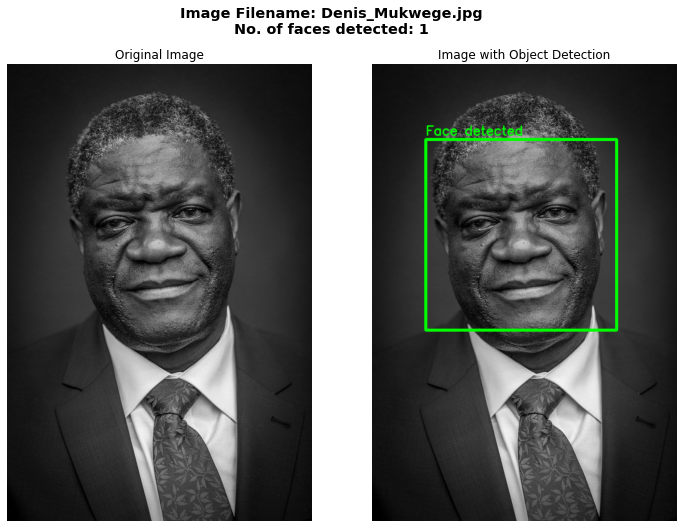

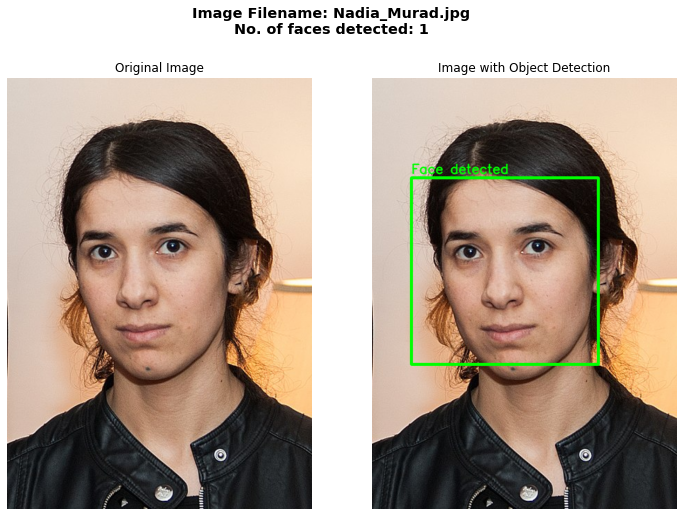

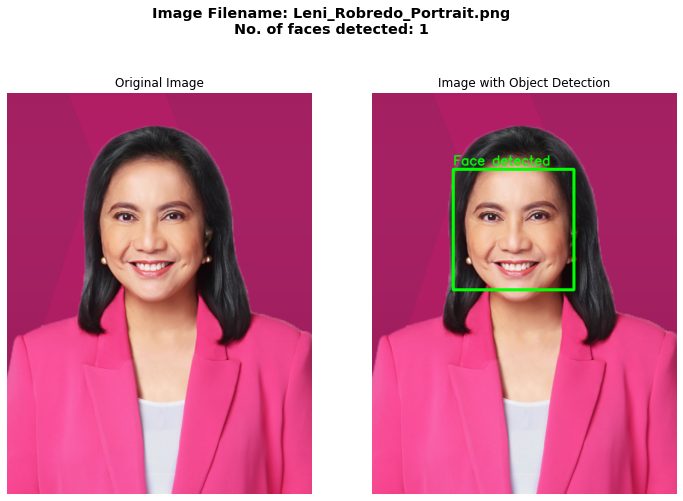

In [11]:
# Gets all images in the input folder and output the detected objects to output folders
imagefilenames = []
for r,d,f in os.walk("DATA/humanfaces"):
    if f !=0:
        for each_file in f:
            imagefilenames.append(os.path.join(r,each_file))
for imagefilename in imagefilenames:
    fig = load_and_detecthumanface(imagefilename)
    outputfilename = 'Output/' + imagefilename.split('/')[-1].split('.')[0]+'.png'
    save_picture(fig,outputfilename)

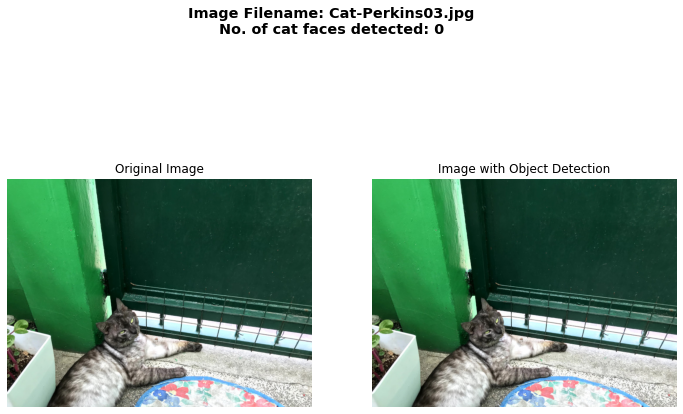

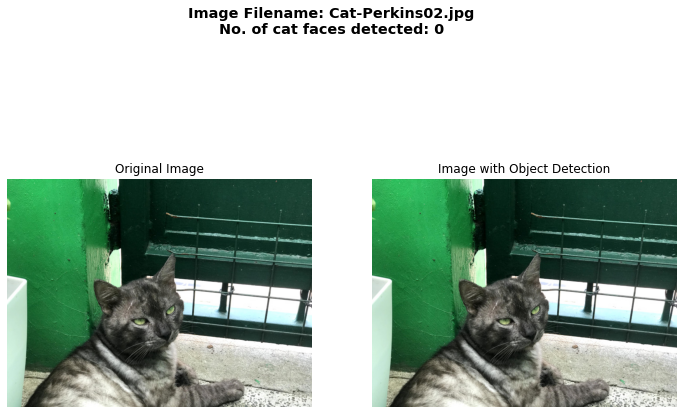

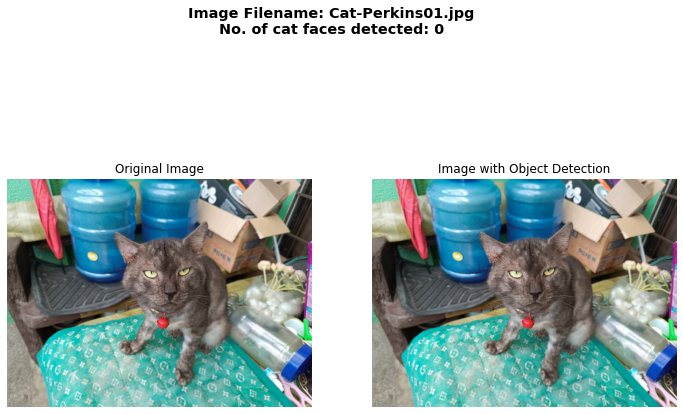

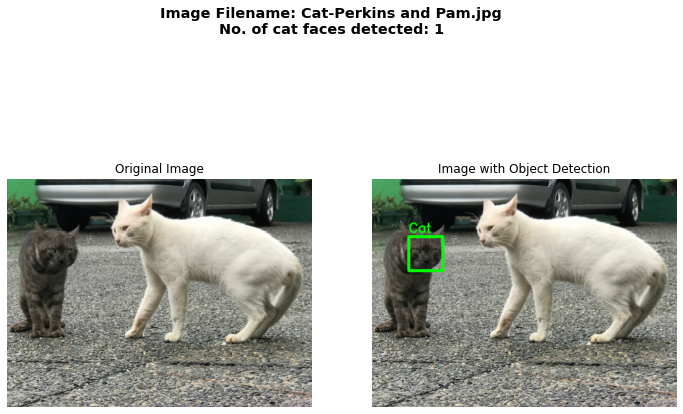

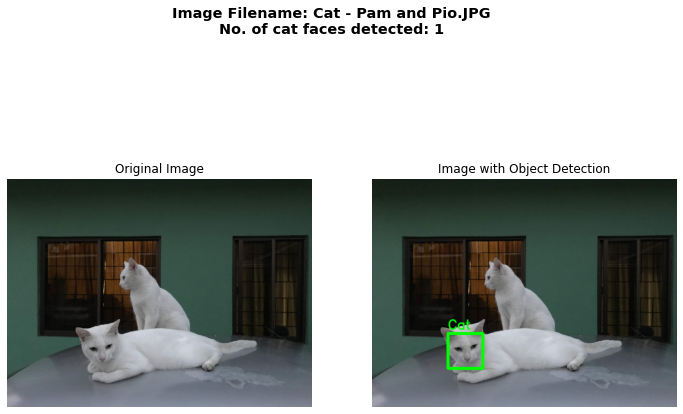

In [12]:
# Gets all images in the input folder and output the detected objects to output folders
imagefilenames = []
for r,d,f in os.walk("DATA/catfaces"):
    if f !=0:
        for each_file in f:
            imagefilenames.append(os.path.join(r,each_file))
for imagefilename in imagefilenames:
    fig = load_and_detectcatface(imagefilename)
    outputfilename = 'Output/' + imagefilename.split('/')[-1].split('.')[0]+'.png'
    save_picture(fig,outputfilename)

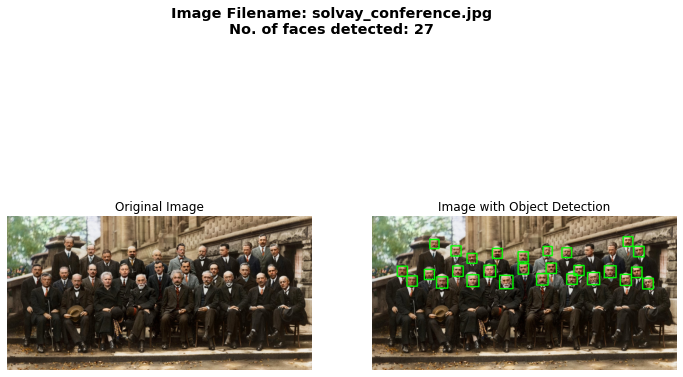

In [13]:
# Gets all images in the input folder and output the detected objects to output folders
imagefilenames = []
for r,d,f in os.walk("DATA/groupfaces"):
    if f !=0:
        for each_file in f:
            imagefilenames.append(os.path.join(r,each_file))
for imagefilename in imagefilenames:
    fig = load_and_detecthumanface(imagefilename,
                                   isResizeImage=False)
    outputfilename = 'Output/' + imagefilename.split('/')[-1].split('.')[0]+'.png'
    save_picture(fig,outputfilename)